In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('seaborn-white')
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['axes.labelsize']   = 18
plt.rcParams['axes.titlesize']   = 18
plt.rcParams['legend.fontsize']  = 18

## Dataset de sinais

In [2]:
h5 = h5py.File('../data/db_sinais.h5','r')
print(list(h5.keys()))

sig = np.array(h5['esperados'])
sat = np.array(h5['saturados'])
ctd = np.array(h5['cortados'])
dpc = np.array(h5['doisPicos'])

['cortados', 'doisPicos', 'esperados', 'saturados']


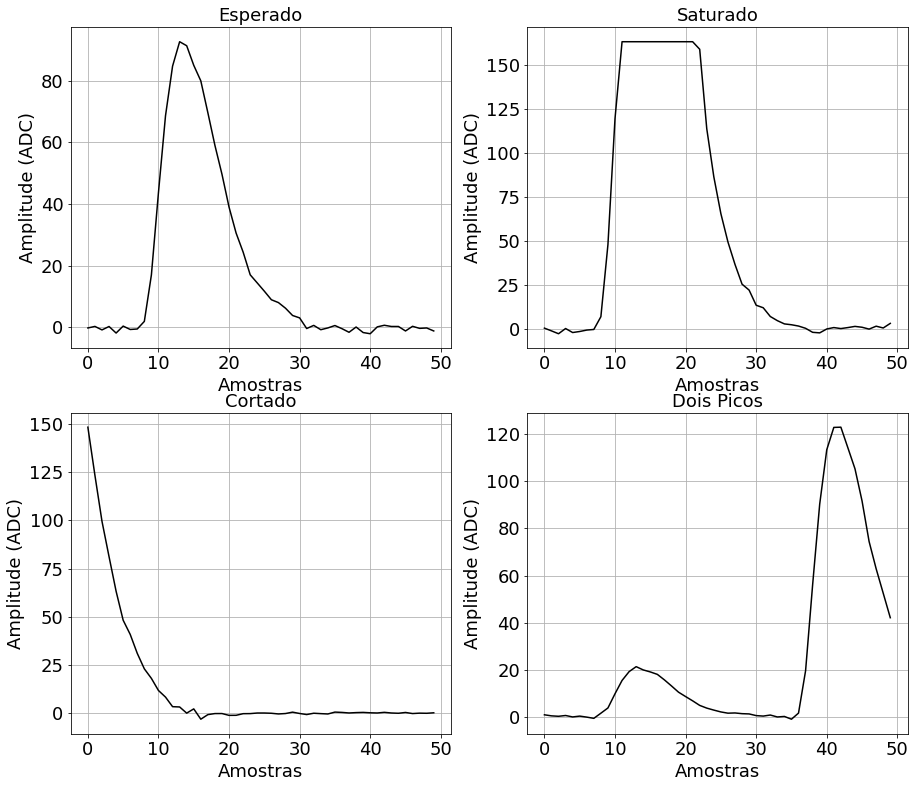

In [3]:
fig = plt.figure(figsize=(15,13))

fig.add_subplot(2,2,1)
plt.plot(sig[3015],'k')
plt.xlabel('Amostras')
plt.ylabel('Amplitude (ADC)')
plt.title('Esperado')
plt.grid()

fig.add_subplot(2,2,2)
plt.plot(sat[6000],'k')
plt.xlabel('Amostras')
plt.ylabel('Amplitude (ADC)')
plt.title('Saturado')
plt.grid()

fig.add_subplot(2,2,3)
plt.plot(ctd[2500],'k')
plt.xlabel('Amostras')
plt.ylabel('Amplitude (ADC)')
plt.title('Cortado')
plt.grid()

fig.add_subplot(2,2,4)
plt.plot(dpc[2500],'k')
plt.xlabel('Amostras')
plt.ylabel('Amplitude (ADC)')
plt.title('Dois Picos')
plt.grid()

plt.show()

### Sinal do Experimento Vs. Sinal do Laboratório

In [4]:
sinais_exp = np.load('../data/Sinais_bons.npy','r')
sinais_exp.shape

(2012, 50)

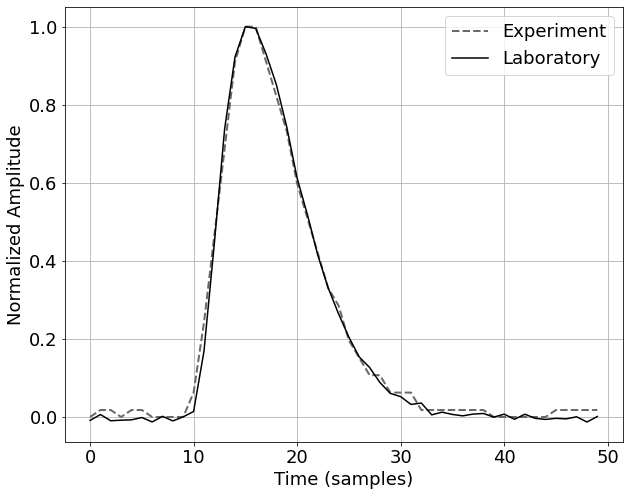

In [5]:
plt.figure(figsize=(10,8))
plt.plot(sinais_exp[1000]/max(sinais_exp[1000]),'--', color='dimgray',linewidth=2.0,label='Experiment')
plt.plot(np.roll(sig[5500]/max(sig[5500]),2),'k',label='Laboratory')
plt.xlabel('Time (samples)')
plt.ylabel('Normalized Amplitude')
plt.grid()
plt.legend()

#plt.savefig('signal_shape.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Dataset de parâmetros

In [6]:
#Load DataFrame
df = pd.read_csv('../data/DataFrame_Aqst.csv',index_col=0)
df.head()

,Amp,Area,Pos_Amp,FWHM,Label
0,6.023878,56.830998,14.0,8.0,1.0
1,5.075051,-37.835989,13.0,6.0,1.0
2,5.075051,-37.945485,13.0,6.0,1.0
3,5.573990,29.943948,14.0,7.0,1.0
4,5.061862,-21.486767,14.0,8.0,1.0


### Amplitude das classes

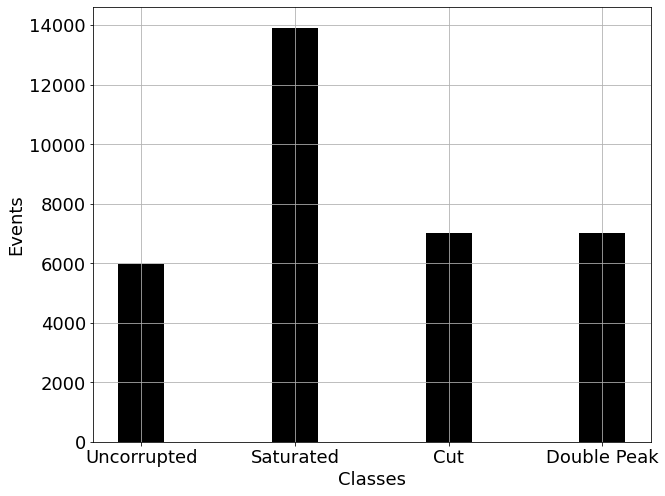

In [7]:
amp = np.array([])
for i in range(1,5):
    amp = np.append(amp, len(df.loc[(df['Label'] == i)]))

classes = ['Uncorrupted', 'Saturated', 'Cut', 'Double Peak']
plt.figure(figsize=(10,8))
plt.bar(classes, amp, width=0.3, color='black')
plt.xlabel('Classes')
plt.ylabel('Events')
plt.grid()

#plt.savefig('amp_classes.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

### PDF dos parâmetros

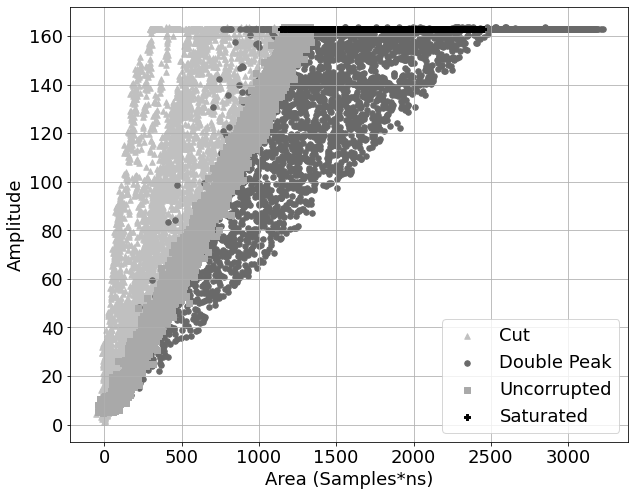

In [8]:
#Amplitude x Área
plt.figure(figsize=(10,8))
cl = [2,3,0,1]
color = ['darkgrey','black', 'silver', 'dimgray']
mk = ('s','P','^','o')
for i in cl:
    amp  = df["Amp"][df["Label"] == i+1]
    area = df["Area"][df["Label"] == i+1]
    plt.scatter(area,amp,label=classes[i],marker=mk[i],s=30,color=color[i])#,edgecolors=color[i],facecolor='None')

plt.legend()
plt.xlabel('Area (Samples*ns)')
plt.ylabel('Amplitude')
plt.grid()
#plt.savefig('area_amp_sim3.png', format='png',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

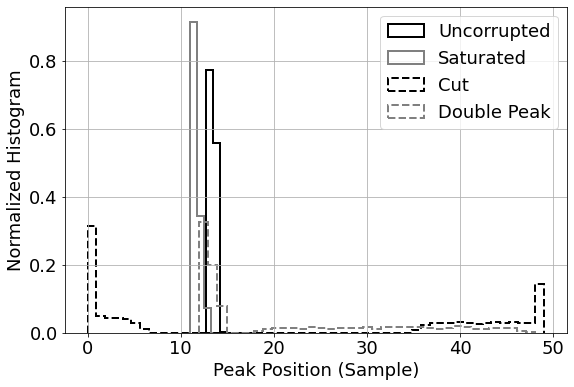

In [9]:
#Posição do pico
bins = [4, 4, 52, 37]
color = ['black','gray','black','gray']
linestyle = ['-','-','--','--']

plt.figure(figsize=(9,6))
for i in range(4):
    plt.hist(df["Pos_Amp"][df["Label"]==i+1],label = classes[i], bins = bins[i], density=True,
           histtype= 'step',linewidth = 2.0, linestyle=linestyle[i], color=color[i])

plt.legend()
plt.xlabel('Peak Position (Sample)')
plt.ylabel('Normalized Histogram')
plt.grid()
#plt.savefig('pos_amp.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

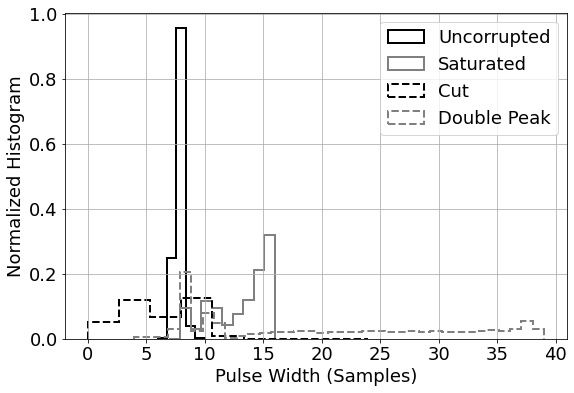

In [10]:
#Largura à meia altura
bins = [5, 10, 9, 36]
color = ['black','gray','black','gray']
linestyle = ['-','-','--','--']

plt.figure(figsize=(9,6))
for i in range(4):
    plt.hist(df["FWHM"][df["Label"]==i+1],label = classes[i], bins = bins[i], density=True, 
           histtype= 'step',linewidth = 2.0, linestyle=linestyle[i], color=color[i])

plt.legend()
plt.xlabel('Pulse Width (Samples)')
plt.ylabel('Normalized Histogram')
plt.grid()
#plt.savefig('pulse_width.pdf', format='pdf',dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()